# Content Based Recommendation

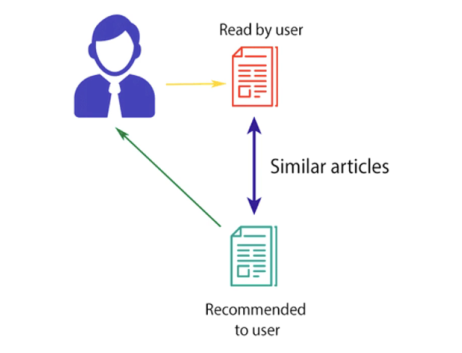

**Recommendations are developed based on the similarities of product contents (metadata).** <br>
++ Metadata Samples: 
* a movie description/director/cast,
* a book description/synopsis, 
* a product description/category information

In [2]:
#1. Creating the TF-IDF Matrix
#2. Creating the Cosine Similarity Matrix
#3. Making Suggestions Based on Similarities
#4. Preparation of Working Script

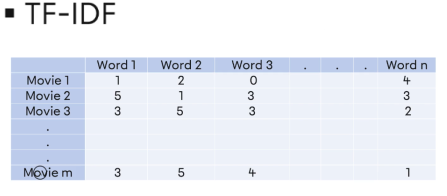 <br>
In the matrix here, the words in each row can go up to n. <br>
"n" ⇒ It is the number of unique words in the text. <br>
Number at row-column intersection ⇒ In which statement, how many words are there ?

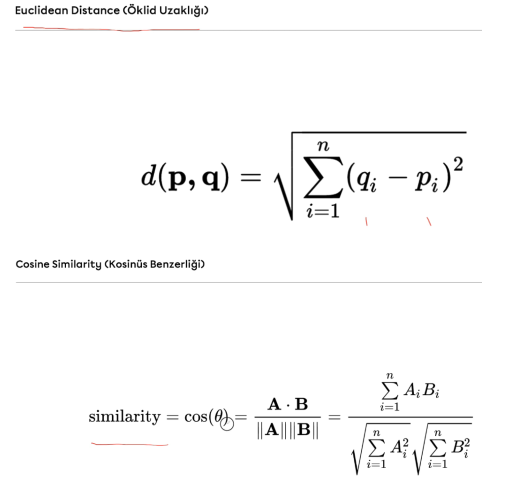
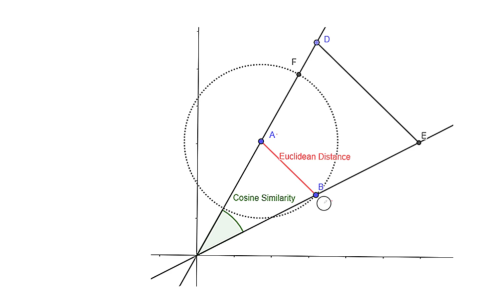

### MiniApp: Developing Recommendations Based on Movie Reviews

**1. Creating the TF-IDF Matrix**

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [4]:
# Data Set: https://www.kaggle.com/rounakbanik/the-movies-dataset
df = pd.read_csv("./datasets/movies_metadata2.csv", low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
df.shape

(45466, 24)

In [6]:
df["overview"].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [7]:
tfidf = TfidfVectorizer(stop_words="english") 
#I made tdidf by removing stop words such as "the", "and" , "on" so that they would not distort our analysis.

In [8]:
df['overview'] = df['overview'].fillna('')

In [9]:
tfidf_matrix = tfidf.fit_transform(df['overview'])

In [11]:
tfidf_matrix.shape #(45466, 75827) => first is "comments", second is "unique words"

(45466, 75827)

In [12]:
df['title'].shape

(45466,)

In [13]:
tfidf.get_feature_names_out()

array(['00', '000', '000km', ..., '첫사랑', 'ﬁrst', 'ﬁve'], dtype=object)

In [14]:
csr_tfidf_matrix = csr_matrix(tfidf_matrix, dtype=np.float32)
# tfidf_matrix.toarray() => It gave memoryError for Unable to allocate 25.7 GiB for an array with shape (45466, 75827)
# and data type float64. So, I used "from scipy.sparse import csr_matrix"
csr_tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**2.Creating the Cosine Similarity Matrix**

In [15]:
cosine_sim = cosine_similarity(csr_tfidf_matrix,
                               csr_tfidf_matrix)

In [16]:
cosine_sim.shape # (45466, 45466) => 45466: overviews count

(45466, 45466)

In [18]:
cosine_sim[1] # This number array comes with the 1st index, contains "similarity scores of the 1st movie" with all other movies

array([0.01504121, 0.99999994, 0.04681952, ..., 0.        , 0.02198641,
       0.00929411], dtype=float32)

**3. Making Suggestions Based on Similarities**

In [19]:
indices = pd.Series(df.index, index=df['title'])

In [21]:
indices.index.value_counts()
# Here, since some titles are in more than one matrix, we need to reduce them to one.
# This is a problem. The last of these types of multiple nomenclatures is taken.
# duplicated(keep='first') is the default. Returns true/false. False => non-duplicate.

title
Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
                        ..
Cluny Brown              1
Babies                   1
The Green Room           1
Captain Conan            1
Queerama                 1
Name: count, Length: 42277, dtype: int64

In [22]:
indices = indices[~indices.index.duplicated(keep='last')]

In [23]:
indices["Cinderella"]

45406

In [24]:
indices["Sherlock Holmes"]

35116

In [25]:
movie_index = indices["Sherlock Holmes"]

In [27]:
cosine_sim[movie_index] # Similarities between the movie "Sherlock Holmes" and other movies were fetched

array([0.        , 0.00392837, 0.00476764, ..., 0.        , 0.0067919 ,
       0.        ], dtype=float32)

In [28]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index],
                                 columns=["score"])

In [29]:
# Since we had our own movie in the 0th index, we skipped it and made [1:11]
movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index

In [30]:
df['title'].iloc[movie_indices]

34737    Приключения Шерлока Холмса и доктора Ватсона: ...
14821                                    The Royal Scandal
34750    The Adventures of Sherlock Holmes and Doctor W...
9743                           The Seven-Per-Cent Solution
4434                                        Without a Clue
29706                       How Sherlock Changed the World
18258                   Sherlock Holmes: A Game of Shadows
24665     The Sign of Four: Sherlock Holmes' Greatest Case
6432                   The Private Life of Sherlock Holmes
29154                          Sherlock Holmes in New York
Name: title, dtype: object

### Functionalize All Process

In [31]:
def calculate_cosine_sim(dataframe):
    tfidf = TfidfVectorizer(stop_words='english')
    dataframe['overview'] = dataframe['overview'].fillna('')
    tfidf_matrix = tfidf.fit_transform(dataframe['overview'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    return cosine_sim

def content_based_recommender(title, cosine_sim, dataframe):
    # indexing
    indices = pd.Series(dataframe.index, index=dataframe['title'])
    indices = indices[~indices.index.duplicated(keep='last')]
    # fetching the index belonging to relevant title
    movie_index = indices[title]
    # calculating similarity scores according to title
    similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
    # Fetching the top 10 movies except himself
    movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    
    return dataframe['title'].iloc[movie_indices]

In [33]:
# cosine_sim = calculate_cosine_sim(df)

In [34]:
content_based_recommender('The Dark Knight Rises', cosine_sim, df)

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [35]:
content_based_recommender("The Godfather", cosine_sim, df)

1178               The Godfather: Part II
44030    The Godfather Trilogy: 1972-1990
1914              The Godfather: Part III
23126                          Blood Ties
11297                    Household Saints
34717                   Start Liquidation
10821                            Election
38030            A Mother Should Be Loved
17729                   Short Sharp Shock
26293                  Beck 28 - Familjen
Name: title, dtype: object

In [36]:
content_based_recommender("The Matrix", cosine_sim, df)

44161                        A Detective Story
44167                              Kid's Story
44163                             World Record
33854                                Algorithm
167                                    Hackers
20707    Underground: The Julian Assange Story
6515                                  Commando
24202                                 Who Am I
22085                           Berlin Express
9159                                  Takedown
Name: title, dtype: object

In [37]:
content_based_recommender("Sherlock Holmes", cosine_sim, df)

34737    Приключения Шерлока Холмса и доктора Ватсона: ...
14821                                    The Royal Scandal
34750    The Adventures of Sherlock Holmes and Doctor W...
9743                           The Seven-Per-Cent Solution
4434                                        Without a Clue
29706                       How Sherlock Changed the World
18258                   Sherlock Holmes: A Game of Shadows
24665     The Sign of Four: Sherlock Holmes' Greatest Case
6432                   The Private Life of Sherlock Holmes
29154                          Sherlock Holmes in New York
Name: title, dtype: object

In [38]:
# If you wish, you can perform these operations by taking the 100 most watched movies on your website,
# creating a recommendation list for each movie and embedding it in the SQL table.
# When the user watches one of these 100 movies, you automatically pull it from the table and pop-up it.